# Q.1 

P(H) = Probability that an employee uses the health insurance plan = 0.7
P(S∣H) = Probability that an employee is a smoker given that he/she uses the health insurance plan = 0.4
We need to find (S∣H). From the information given, we already have P(S∣H), which is 0.4. Thus, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.4 or 40%.

# Q.2
Bernoulli Naive Bayes:

Designed for binary/boolean features.
Each feature is independent and takes on a binary value (0 or 1).
Useful for text classification where the presence or absence of a word is more important than its frequency.
Multinomial Naive Bayes:

Designed for discrete features.
Features represent the frequency of occurrences.
Commonly used for text classification where the frequency of words is considered.

# Q.3

Bernoulli Naive Bayes does not handle missing values directly. In practice, missing values can be handled before applying the Bernoulli Naive Bayes model by:

Imputing missing values with a specific value, such as 0 or the mean/mode of the feature.
Using techniques like mean/median/mode imputation, or more sophisticated methods like K-nearest neighbors (KNN) imputation.

# Q.4
Yes, Gaussian Naive Bayes can be used for multi-class classification. It extends to multiple classes by assuming that the feature values for each class are normally distributed and estimating the parameters of the normal distribution (mean and variance) for each class.

# Q.5

In [27]:
import pandas as pd
df = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",header=None)

In [40]:
df.duplicated().sum()

391

In [47]:
df.drop_duplicates(inplace=True)

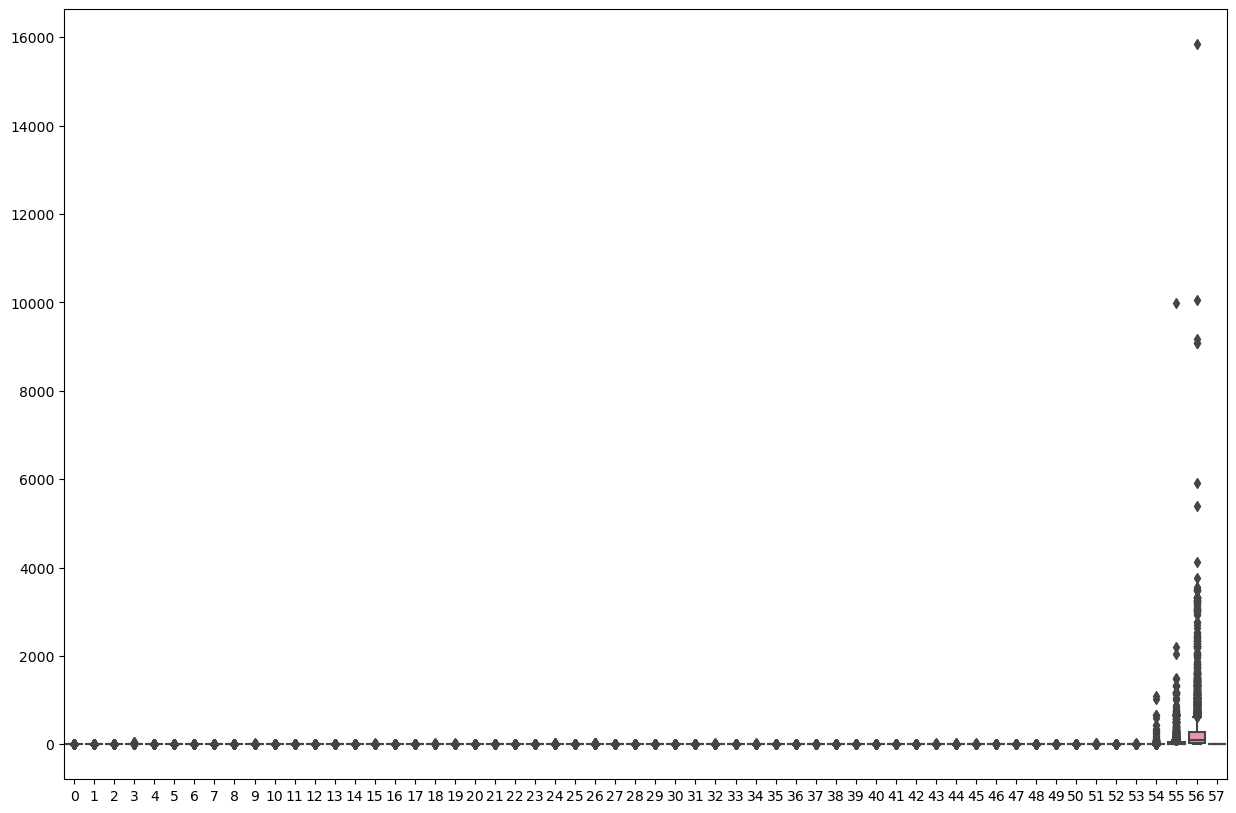

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.show()

In [54]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

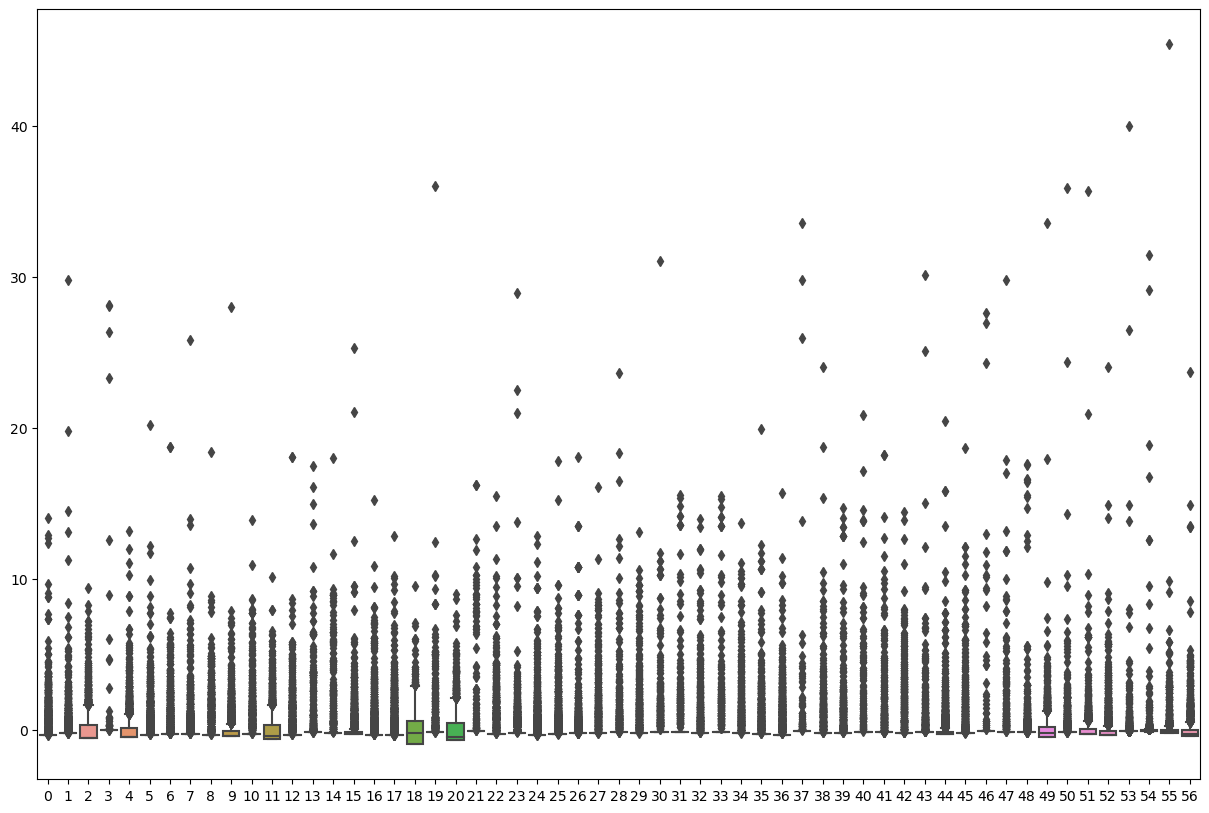

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(X_train_scaled)
plt.show()

In [34]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

In [70]:
model = {
    'Bernouli':BernoulliNB(),
    # 'Multinomial':MultinomialNB(),
    'Gausian':GaussianNB()
}

In [91]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
def evaluate(X_train_scaled,X_test_scaled,y_train,y_test,model):
    
    report = {}
    
    for i in range(len(model)):
        ml = list(model.values())[i]
        ml.fit(X_train_scaled,y_train)
        
        y_pred = ml.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_pred,y_test)
        F1_score = f1_score(y_pred,y_test)
        precetion = precision_score(y_pred,y_test)
        recall = recall_score(y_pred,y_test)
        
        report[list(model.keys())[i]] = f"Accuracy {accuracy},F1_score{F1_score}"
        
    return report

In [92]:
evaluate(X_train_scaled,X_test_scaled,y_train,y_test,model)

{'Bernouli': 'Accuracy 0.8926875593542261,F1_score0.8656361474435196',
 'Gausian': 'Accuracy 0.8300094966761633,F1_score0.8246816846229188'}